<h1>Page 25</h1>

In [128]:
# Use this package to read .rda datasets
import pyreadr # pip install pyreader

In [129]:
# Reading a gavote dataset
wcgs = pyreadr.read_r('data/wcgs.rda')['wcgs']

In [130]:
wcgs

,age,height,weight,sdp,dbp,chol,behave,cigs,dibep,chd,typechd,timechd,arcus
0,49,73,150,110,76,225,A2,25,A,no,none,1664,absent
1,42,70,160,154,84,177,A2,20,A,no,none,3071,present
2,42,69,160,110,78,181,B3,0,B,no,none,3071,absent
3,41,68,152,124,78,132,B4,20,B,no,none,3064,absent
4,59,70,150,144,86,255,B3,20,B,yes,infdeath,1885,present
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3149,41,70,173,124,78,215,A2,0,A,no,none,3056,absent
3150,45,69,200,144,82,261,B3,0,B,no,none,3056,absent
3151,50,70,165,122,82,242,A2,50,A,no,none,2383,present
3152,39,68,168,126,76,213,B3,0,B,no,none,3053,absent


In [131]:
# We start by focusing on just three of the variables in the dataset
wcgs[['chd','height','cigs']].describe(include = 'all')

,chd,height,cigs
count,3154,3154.000000,3154.000000
unique,2,NaN,NaN
top,no,NaN,NaN
freq,2897,NaN,NaN
mean,NaN,69.777743,11.600507
std,NaN,2.528693,14.517579
min,NaN,60.000000,0.000000
25%,NaN,68.000000,0.000000
50%,NaN,70.000000,0.000000
75%,NaN,72.000000,20.000000


In [132]:
# In this chapter we are going to use seaborn library to plot any chart
import seaborn as sns 


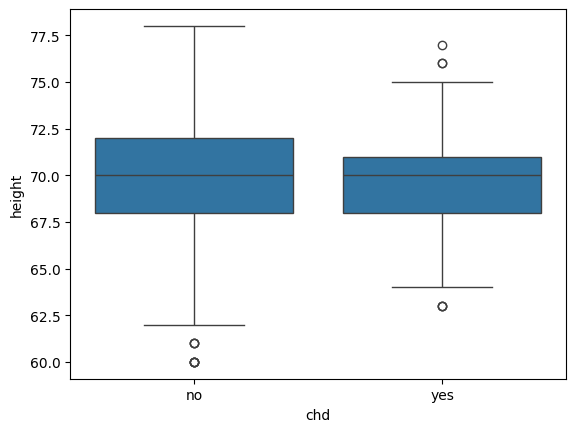

In [133]:
# Plot a boxplot - to show the similarity in the distribution of heights of the two groups of men with and without heart disease
sns.boxplot(data=wcgs,
            x ='chd',
            y = 'height');

In [134]:
# We convert the absence/presence of disease into a numerical 0/1 variable
wcgs['y'] = wcgs['chd'].cat.codes
        

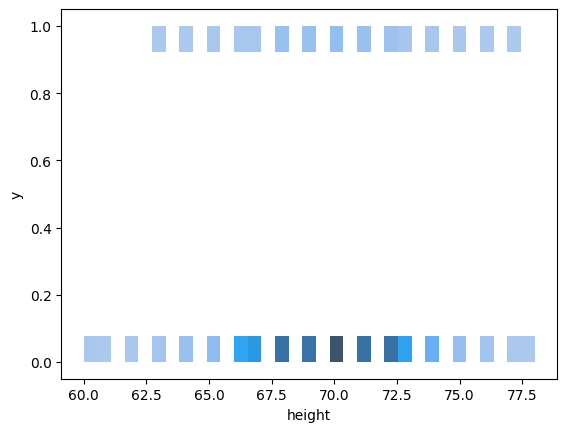

In [135]:
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'height');

<h1> Page 26 </h1>

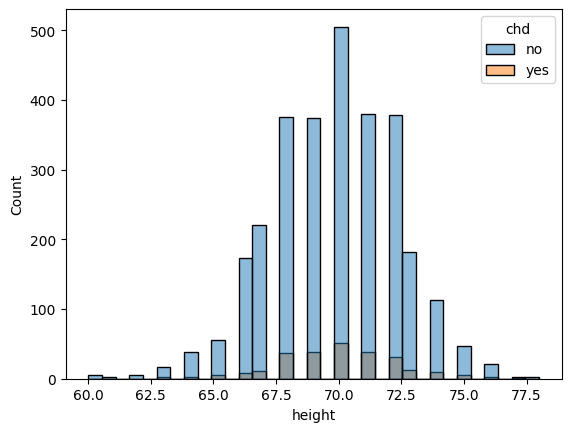

In [136]:
# Plot a histogram - Count height distribution usage for men with and without heart disease.
sns.histplot(data=wcgs,
             x = 'height',
             hue = 'chd');

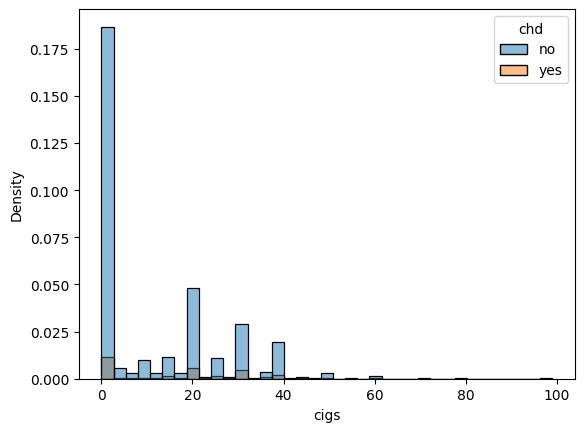

In [137]:
# Plot a histogram - Density cigarette distribution for men with and without heart disease.
sns.histplot(data=wcgs,
             x = 'cigs',
             hue = 'chd',
             stat='density');

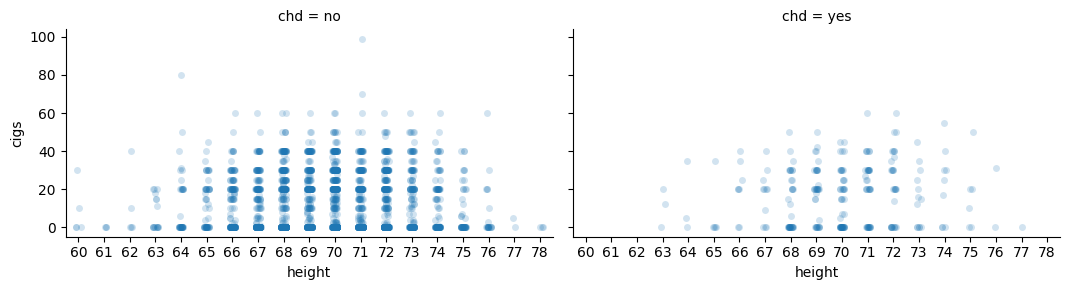

In [138]:
# Stripplot - Height and cigarette consumption for men without heart disease on the left and with heart diseas on the right.
sns.FacetGrid(data=wcgs,
              col='chd',
              aspect=1.8).map(
                  sns.stripplot, 
                  "height", 
                  "cigs", 
                  jitter=True, 
                  alpha=0.2,
                  order = None);

<h1>Page 28 </h1>

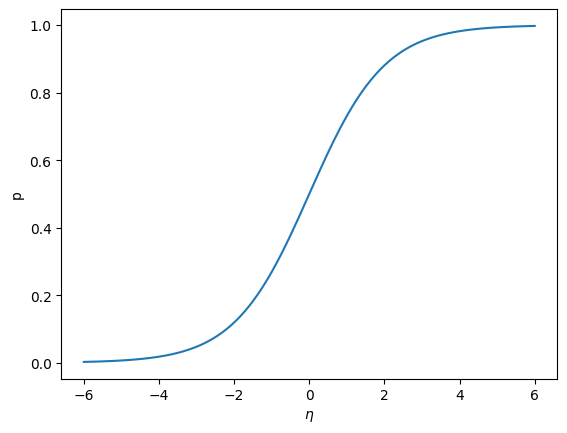

In [139]:
# A Logistic relationship between the probability of the response, p, and the linear predictor, n
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # expit is the logistic function

# Define the range for x
x = np.linspace(-6, 6, 400)

# Calculate the logistic function values
y = expit(x)

# Create the plot
plt.plot(x,y)
plt.xlabel("$\eta$")
plt.ylabel("p");

<h1>Page 29 </h1>

In [140]:
# The Generalized Linear Model (GLM) with the binomial link function
import statsmodels.formula.api as smf

lmod = smf.logit(data = wcgs,
           formula = "y~height+cigs").fit();

Optimization terminated successfully.
         Current function value: 0.277275
         Iterations 7


In [141]:
# We can examine the standard summary output
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3154
Model:                          Logit   Df Residuals:                     3151
Method:                           MLE   Df Model:                            2
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                 0.01807
Time:                        22:07:52   Log-Likelihood:                -874.52
converged:                       True   LL-Null:                       -890.62
Covariance Type:            nonrobust   LLR p-value:                 1.021e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5016      1.842     -2.444      0.015      -8.112      -0.892
height         0.0252      0.026      0.957      0.338      -0.026       0.077
cigs           0.0231      0.004      5.724      0.000       0.015       0.031
==============================================================================
"""

<h1>Page 30 </h1>

In [142]:
# Extract the coefficients
lmod.params

Intercept   -4.501614
height       0.025208
cigs         0.023127
dtype: float64

In [143]:
beta1 = lmod.params.Intercept
beta2 = lmod.params.height
beta3 = lmod.params.cigs

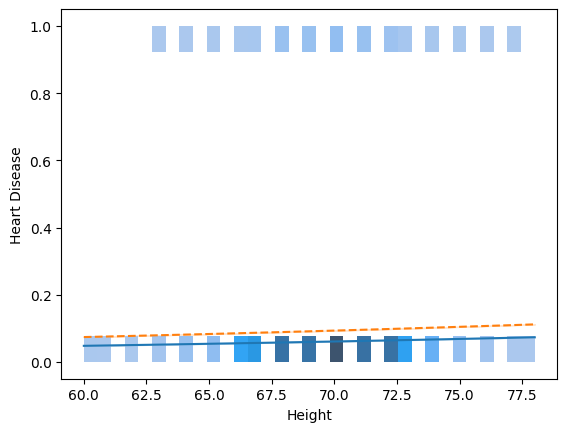

In [144]:
# Height
x = wcgs['height']

# Vary the height for the nonsmokers
nonsmokers = beta1+beta2*x+beta3*0 

# Vary the height for the 20 day smokers
smokers = beta1+beta2*x+beta3*20

# Solid line represent nonsmokers
sns.lineplot(x = x,
             y = expit(nonsmokers))
# Dashed line ia pack-a-day smoker
sns.lineplot(x = x,
             y = expit(smokers), 
             linestyle='--')
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'height')
plt.xlabel("Height")
plt.ylabel("Heart Disease");


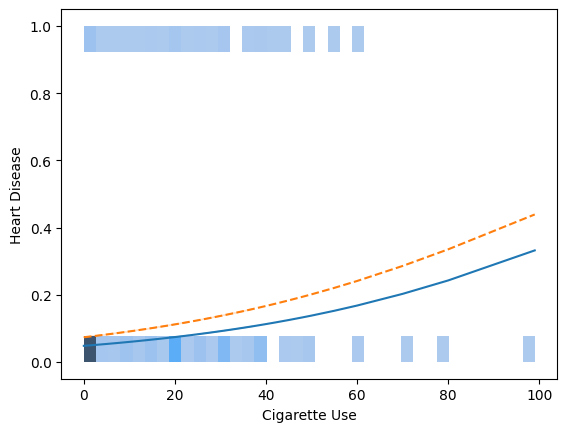

In [145]:
# Cigarette
x = wcgs['cigs']

# Vary the cigarette for the 60 inch tall man
short_man = beta1+beta2*60+beta3*x

# Vary the cigarette for the 78 inch tall man
tall_man = beta1+beta2*78+beta3*x

# Solid line represent a very short man (60 in. tall)
sns.lineplot(x = x,
             y = expit(short_man))
# Dashed line a very tall man (78 in. tall)
sns.lineplot(x = x,
             y = expit(tall_man), 
             linestyle='--')
# Plot a histograms - showing the distribution of heights for both those with and without heart disease
sns.histplot(data=wcgs,
            y ='y',
            x = 'cigs')
plt.xlabel("Cigarette Use")
plt.ylabel("Heart Disease");


<h1>Page 32</h1>

In [146]:
# Interpreting Odds

In [147]:
# Exponentiated coefficients
np.exp(lmod.params)

Intercept    0.011091
height       1.025528
cigs         1.023397
dtype: float64

In [148]:
# Compute the effect of a pack a day (20 cigarettes)
np.exp(beta3*20)

1.5881152900690745

In [149]:
# The predicted probabilities of getting heart disease for a 68in. tall man who does not smoke and who smokes 20 a day
expit((beta1+beta2*68+beta3*20,beta1+beta2*68+beta3*0))

array([0.08907868, 0.05800425])

In [150]:
# The relative risk is then:
expit(beta1+beta2*68+beta3*20)/expit(beta1+beta2*68+beta3*0)

1.5357267534451848

<h1> Page 33 </h1>

In [151]:
# Inference

In [152]:
lmodc = smf.logit(data=wcgs,
                formula="y~cigs").fit()

Optimization terminated successfully.
         Current function value: 0.277421
         Iterations 7


In [153]:
# anova_lm is used to compare the two models. The typ=1 argument specifies the type of sum of squares to be used in the ANOVA
from statsmodels.stats.anova import anova_lm

In [154]:
# The p-value is computed using the chi-squared distribution's survival function 
from scipy.stats import chi2

In [155]:
import pandas as pd

In [156]:
# Calculate the likelihood ratio test statistic (deviance)
lr_statistic = 2 * (lmod.llf - lmodc.llf)
df_diff = lmod.df_model - lmodc.df_model
p_value = chi2.sf(lr_statistic, df_diff)

# Residual degrees of freedom
resid_df_c = lmodc.df_resid
resid_df_f = lmod.df_resid

# Residual deviance
resid_dev_c = -2 * lmodc.llf
resid_dev_f = -2 * lmod.llf

# Create the analysis of deviance table
deviance_table = pd.DataFrame({
    'Resid. Df': [resid_df_c, resid_df_f],
    'Resid. Dev': [resid_dev_c, resid_dev_f],
    'Df': [None, df_diff],
    'Deviance': [None, lr_statistic],
    'p-value': [None, p_value]
})
# Display the table
print(deviance_table)

   Resid. Df   Resid. Dev   Df  Deviance  p-value
0     3152.0  1749.969480  NaN       NaN      NaN
1     3151.0  1749.049233  1.0  0.920247  0.33741


<h1>Page 34</h1>

In [157]:
# Function to perform single term deletions (drop1 equivalent)
def drop1_test(model, data):
    full_model_llf = model.llf
    full_model_df = model.df_model
    
    results = []
    predictors = model.model.exog_names[1:]  # Exclude the intercept
    
    for predictor in predictors:
        formula = 'y ~ ' + ' + '.join([p for p in predictors if p != predictor])
        reduced_model = smf.logit(formula=formula, data=data).fit(disp=0)
        
        lr_statistic = 2 * (full_model_llf - reduced_model.llf)
        df_diff = full_model_df - reduced_model.df_model
        p_value = chi2.sf(lr_statistic, df_diff)
        
        results.append({
            'Predictor': predictor,
            'Df': reduced_model.df_model,
            'Deviance': -2 * reduced_model.llf,
            'AIC': reduced_model.aic,
            'LRT': lr_statistic,
            'p-value': p_value
        })
    
    return pd.DataFrame(results)

# Perform the single term deletions test
drop1_results = drop1_test(lmod, wcgs)

# Display results
drop1_results

,Predictor,Df,Deviance,AIC,LRT,p-value
0,height,1.0,1749.969480,1753.969480,0.920247,3.374101e-01
1,cigs,1.0,1780.118737,1784.118737,31.069504,2.489521e-08


In [158]:
# An alternative to this test is the z-value, which is appoximately normmally distributed.
# This table include the likelihood-based confident interval
lmod.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-4.5016,1.842,-2.444,0.015,-8.112,-0.892
height,0.0252,0.026,0.957,0.338,-0.026,0.077
cigs,0.0231,0.004,5.724,0.000,0.015,0.031


<h1>Page 35</h1>

In [159]:
# Diagnostics

In [160]:
# The predicted values in the linear predictor scale
linpred = lmod.fittedvalues
linpred.head(6)

0   -2.083261
1   -2.274521
2   -2.762277
3   -2.324936
4   -2.274521
5   -2.686653
dtype: float64

In [161]:
# The predicted probability
predprob = lmod.predict()

In [162]:
linpred

0      -2.083261
1      -2.274521
2      -2.762277
3      -2.324936
4      -2.274521
          ...   
3149   -2.737069
3150   -2.762277
3151   -1.580699
3152   -2.787484
3153   -1.887596
Length: 3154, dtype: float64

In [163]:
predprob

array([0.11073449, 0.09325523, 0.05939705, ..., 0.17069652, 0.05800425,
       0.13151878])

In [164]:
expit(linpred)

0       0.110734
1       0.093255
2       0.059397
3       0.089079
4       0.093255
          ...   
3149    0.060821
3150    0.059397
3151    0.170697
3152    0.058004
3153    0.131519
Length: 3154, dtype: float64

In [165]:
# Compute the raw residuals as y-p:
# This is the same as lmod.resid_generalized
rawres = wcgs['y']-predprob

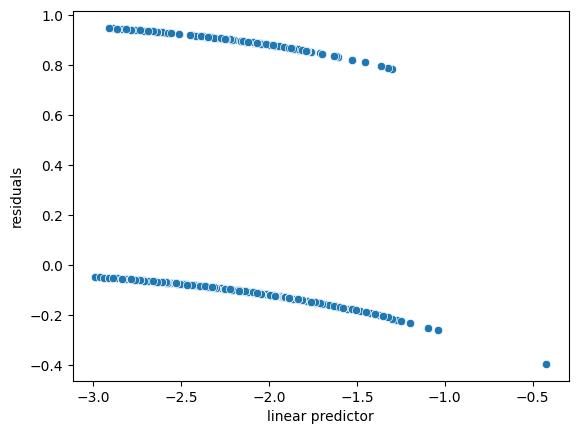

In [166]:
# The following standard practice for diagnotics in linear models, we plot the residuals againts the fitted values
sns.scatterplot(x = lmod.fittedvalues,
                y = lmod.resid_generalized)
plt.xlabel("linear predictor")
plt.ylabel("residuals");

<h1>Page 36 </h1>

In [180]:
# Add the residuals and linear predictor into the data frame
wcgs['rawres'] = rawres
wcgs['linpred'] = linpred